# Предварительный анализ данных для набора данных продажи лекарств

В этом блокноте выполняется предварительный анализ данных (EDA) для набора данных `DrugSalesData.csv`. Анализ состоит из разделов оценки структуры, целостности, полноты  данных и выявления отклонений и аномалий.

# Информация о наборе данных

Drug Sales Data - является набором данных о продажах лекарств были получены за 357 дней в период с 07.05.2018 по 29.04.2019 может использоваться в исследованиях о сезонных продажах лекарств.
Ссылка на оригинальный датасет: https://www.kaggle.com/datasets/emrahaydemr/drug-sales-data?resource=download

Ссылка на гугл диск https://drive.google.com/drive/folders/1CSZcGCgXEy_ZbNvHZgqwDmDw4ahwy8xe?usp=drive_link

Цель данного анализа - выявление влияние сезонности в разных годах на увеличение продажи лекарств.

## 1. Загрузка набора данных

В этом разделе мы загружаем набор "сырых" данных из источника, устанавливаем необходимые библиотеки и просматриваем первые 10 строк, чтобы понять структуру данных.

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
from io import StringIO

FILE_ID = "1Svje8GeeWe-hp_F-FNtnYZEGHWo1Lp-Y"
file_url = f"https://drive.google.com/uc?export=download&id={FILE_ID}"

response = requests.get(file_url)

raw_data = pd.read_csv(StringIO(response.text), sep=';', encoding='utf-8')

print("Форма данных:", raw_data.shape)
print("\nПервые 10 строк:")
print(raw_data.head(10))


Форма данных: (64709, 36)

Первые 10 строк:
   Patient name  Company Name  DoctorNameSurname  Protocol  \
0           662            39                812     13656   
1           662            39                812     13656   
2           662            39                812     13656   
3           662            39                812     13656   
4           662            39                812     13656   
5           662            39                812     13656   
6           662            39                812     13656   
7          8050            16                402      2233   
8          8050            16                402      2233   
9          9601            75                292     64675   

                             Drug Name  Medicine Drug Dosage Expiry Date  \
0        PURlNOL EFERVESAN 7O G GRANUL         1        11.05.2018 00:00   
1    COLNAR 1O MG 28 FlLM KAPLl TABLET         4        27.08.2018 00:00   
2            CORASPlN 1OO MG 3O TABLET       

/tmp/ipython-input-3972657087.py:14: DtypeWarning:

Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.



Структура данных:

| № | Название колонки | Тип данных | Описание |
|---|-------------------|------------|----------|
| 0 | **Patient name** | int64 | Уникальный идентификатор пациента |
| 1 | **Company Name** | int64 | Идентификатор страховой компании |
| 2 | **DoctorNameSurname** | int64 | Идентификатор врача |
| 3 | **Protocol** | int64 | Номер протокола/рецепта |
| 4 | **Drug Name** | string | Название лекарственного препарата |
| 5 | **Medicine** | int64 | Количество упаковок лекарства |
| 6 | **Drug Dosage Expiry Date** | datetime64[ns] | Срок годности препарата |
| 7 | **Medicine.1** | Float64 | Цена за единицу лекарства |
| 8 | **Medicine.2** | Float64 | Скидка или доплата по лекарству |
| 9 | **Pickup Time** | datetime64[ns] | Время получения лекарства в аптеке |
| 10 | **IlacReceteTutari** | Float64 | Общая сумма за лекарства по рецепту |
| 11 | **DrugSerNo** | string | Серийный номер препарата (почти все значения отсутствуют) |
| 12 | **ReceteBrutTotal** | Float64 | Общая брутто-сумма рецепта |
| 13 | **Pharmacy** | Float64 | Идентификатор аптеки |
| 14 | **ERecete** | string | Тип рецепта (E-электронный) |
| 15 | **EReceteNo** | Float64 | Номер электронного рецепта |
| 16 | **The patient's debt** | Float64 | Задолженность пациента |
| 17 | **PatientTour** | string | Статус страхования пациента |
| 18 | **Hkp** | Float64 | Коэффициент страхового покрытия |
| 19 | **ReceteIlacFarki** | Float64 | Разница в стоимости рецепта |
| 20 | **Field of Medicine** | string | Специализация врача/область лечения |
| 21 | **ReceteDrug DomainName** | int64 | Доменная категория лекарства |
| 22 | **Recipe** | string | Дополнительная информация о рецепте |
| 23 | **ReceteIndOnTop** | Float64 | Индикатор или надбавка к рецепту |
| 24 | **Recetion** | int64 | Тип или категория рецепта |
| 25 | **Public Discount** | Float64 | Государственная скидка |
| 26 | **Salary** | int64 | Уровень дохода/зарплаты пациента |
| 27 | **ReceteNetAmount** | Float64 | Чистая сумма рецепта |
| 28 | **ReceteKP** | int64 | Код пункта выдачи рецепта |
| 29 | **RecipeDate** | datetime64[ns] | Дата выписки рецепта |
| 30 | **Reporting** | int64 | Код отчетности |
| 31 | **NobetciMi** | int64 | Флаг дежурной службы (1-да, 0-нет) |
| 32 | **Season** | string | Сезон выписки рецепта |
| 33 | **ID** | int64 | Уникальный идентификатор записи |
| 34 | **Drug Group** | string | Фармакологическая группа препарата |
| 35 | **Receipt Date** | datetime64[ns] | Дата получения/обработки |


Следующим этапом мы проводим первичную обработку данных, приведение типов данных.

In [76]:
df  = raw_data

print(df.dtypes)

def auto_convert_data():

    for col in df.columns:
        if  df[col].dtype == object:
            s = df[col].astype('string').str.strip()

            s_num = pd.to_numeric(s.str.replace(',', '.', regex=False), errors='coerce')
            if s_num.notna().sum() / len(s) >= 0.9:
                df[col] = s_num
                continue

            s_dt = pd.to_datetime(s, errors='coerce', dayfirst=True)
            if s_dt.notna().sum() / len(s) >= 0.9:
                df[col] = s_dt
                continue

            df[col] = s
    df_convert_data = df
    print(df_convert_data.dtypes)

if __name__ == "__main__":
    auto_convert_data()


Patient name                int64
Company Name                int64
DoctorNameSurname           int64
Protocol                    int64
Drug Name                  object
Medicine                    int64
Drug Dosage Expiry Date    object
Medicine.1                 object
Medicine.2                 object
Pickup Time                object
IlacReceteTutari           object
DrugSerNo                  object
ReceteBrutTotal            object
Pharmacy                   object
ERecete                    object
EReceteNo                  object
The patient's debt         object
PatientTour                object
Hkp                        object
ReceteIlacFarki            object
Field of Medicine          object
ReceteDrug DomainName       int64
Recipe                     object
ReceteIndOnTop             object
Recetion                    int64
Public Discount            object
Salary                      int64
ReceteNetAmount            object
ReceteKP                    int64
RecipeDate    

/tmp/ipython-input-1172392688.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-1172392688.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-1172392688.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-1172392688.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Patient name                        int64
Company Name                        int64
DoctorNameSurname                   int64
Protocol                            int64
Drug Name                  string[python]
Medicine                            int64
Drug Dosage Expiry Date    datetime64[ns]
Medicine.1                        Float64
Medicine.2                        Float64
Pickup Time                datetime64[ns]
IlacReceteTutari                  Float64
DrugSerNo                  string[python]
ReceteBrutTotal                   Float64
Pharmacy                          Float64
ERecete                    string[python]
EReceteNo                         Float64
The patient's debt                Float64
PatientTour                string[python]
Hkp                               Float64
ReceteIlacFarki                   Float64
Field of Medicine          string[python]
ReceteDrug DomainName               int64
Recipe                     string[python]
ReceteIndOnTop                    

/tmp/ipython-input-1172392688.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-1172392688.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



## 2. Оценка структуры набора данных

Ещще раз проверяем типы данных и измерений набора данных. Находим повторяющиеся строки и выводим общую статистику по цене лекарства.

In [77]:
data = df

data.info()

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

data['Salary'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64709 entries, 0 to 64708
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient name             64709 non-null  int64         
 1   Company Name             64709 non-null  int64         
 2   DoctorNameSurname        64709 non-null  int64         
 3   Protocol                 64709 non-null  int64         
 4   Drug Name                64703 non-null  string        
 5   Medicine                 64709 non-null  int64         
 6   Drug Dosage Expiry Date  64709 non-null  datetime64[ns]
 7   Medicine.1               64709 non-null  Float64       
 8   Medicine.2               64709 non-null  Float64       
 9   Pickup Time              64709 non-null  datetime64[ns]
 10  IlacReceteTutari         64709 non-null  Float64       
 11  DrugSerNo                1 non-null      string        
 12  ReceteBrutTotal          64709 n

,Salary
count,64709.000000
mean,2.842387
std,7.192233
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,118.000000


В наших данных не обнарожилось дубликатов, далее делаем проверку на пропущенные значения.

Визуализируем отсутствующие шаблоны данных с помощью тепловых карт.

Missing values per column:
Patient name                   0
Company Name                   0
DoctorNameSurname              0
Protocol                       0
Drug Name                      6
Medicine                       0
Drug Dosage Expiry Date        0
Medicine.1                     0
Medicine.2                     0
Pickup Time                    0
IlacReceteTutari               0
DrugSerNo                  64708
ReceteBrutTotal                0
Pharmacy                       0
ERecete                    18589
EReceteNo                      2
The patient's debt             0
PatientTour                    0
Hkp                            0
ReceteIlacFarki                0
Field of Medicine           9966
ReceteDrug DomainName          0
Recipe                     59503
ReceteIndOnTop                 0
Recetion                       0
Public Discount                0
Salary                         0
ReceteNetAmount                0
ReceteKP                       0
RecipeDate      

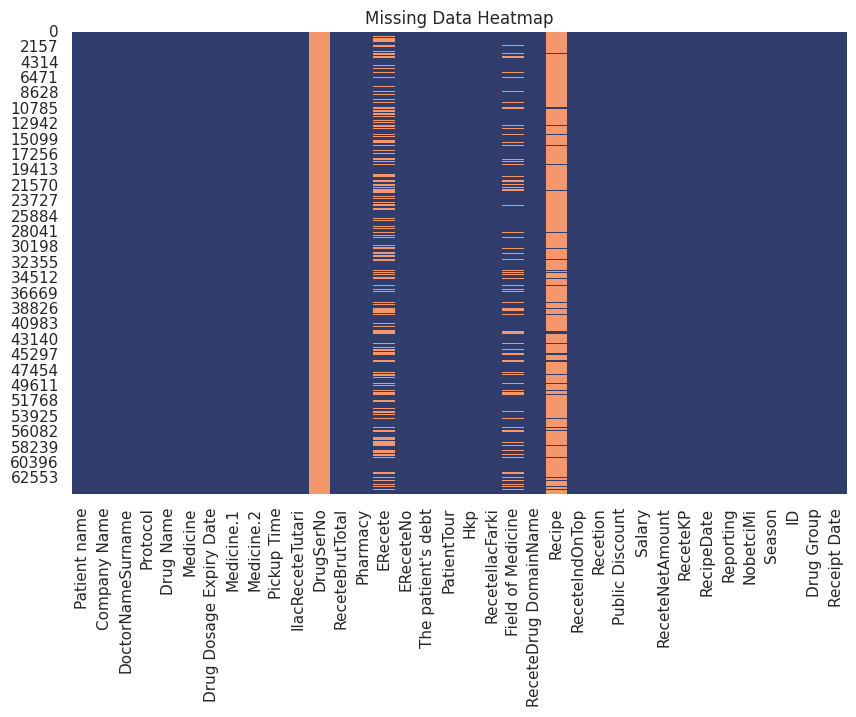

In [78]:
# Поиск пропущенных значений
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Сторим карту пропущенных значений

colors = ['#303C6C','#F4976C']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=False, cmap=custom_cmap)
plt.title("Missing Data Heatmap")
plt.show()

Больше всего значений отсутствует в DrugSerNo и Recipe, поскольку эти значения на влияют на цель анализа их можно исключить.

In [79]:
data = data.drop(['DrugSerNo', 'Recipe'], axis=1)
print(data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64709 entries, 0 to 64708
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient name             64709 non-null  int64         
 1   Company Name             64709 non-null  int64         
 2   DoctorNameSurname        64709 non-null  int64         
 3   Protocol                 64709 non-null  int64         
 4   Drug Name                64703 non-null  string        
 5   Medicine                 64709 non-null  int64         
 6   Drug Dosage Expiry Date  64709 non-null  datetime64[ns]
 7   Medicine.1               64709 non-null  Float64       
 8   Medicine.2               64709 non-null  Float64       
 9   Pickup Time              64709 non-null  datetime64[ns]
 10  IlacReceteTutari         64709 non-null  Float64       
 11  ReceteBrutTotal          64709 non-null  Float64       
 12  Pharmacy                 64709 n

## 4. Поиск выбросов и аномалий

Проверим также числовые признаки с помощью межквартильного размаха(IQR) и построим график для выявления выбросов и аномалий в числовых столбцах. Проверим также выбросы в строковых значениях.

Outliers per column:
Patient name                 0
Company Name                 0
DoctorNameSurname            0
Protocol                     0
Medicine                 13545
Medicine.1                5182
Medicine.2               10494
IlacReceteTutari          6591
ReceteBrutTotal           6759
Pharmacy                  6805
EReceteNo                    2
The patient's debt        2399
Hkp                       3407
ReceteIlacFarki           4916
ReceteDrug DomainName        0
ReceteIndOnTop            7038
Recetion                     0
Public Discount           7612
Salary                   13945
ReceteNetAmount           7354
ReceteKP                   675
Reporting                 5966
NobetciMi                 6419
ID                           0
dtype: Int64


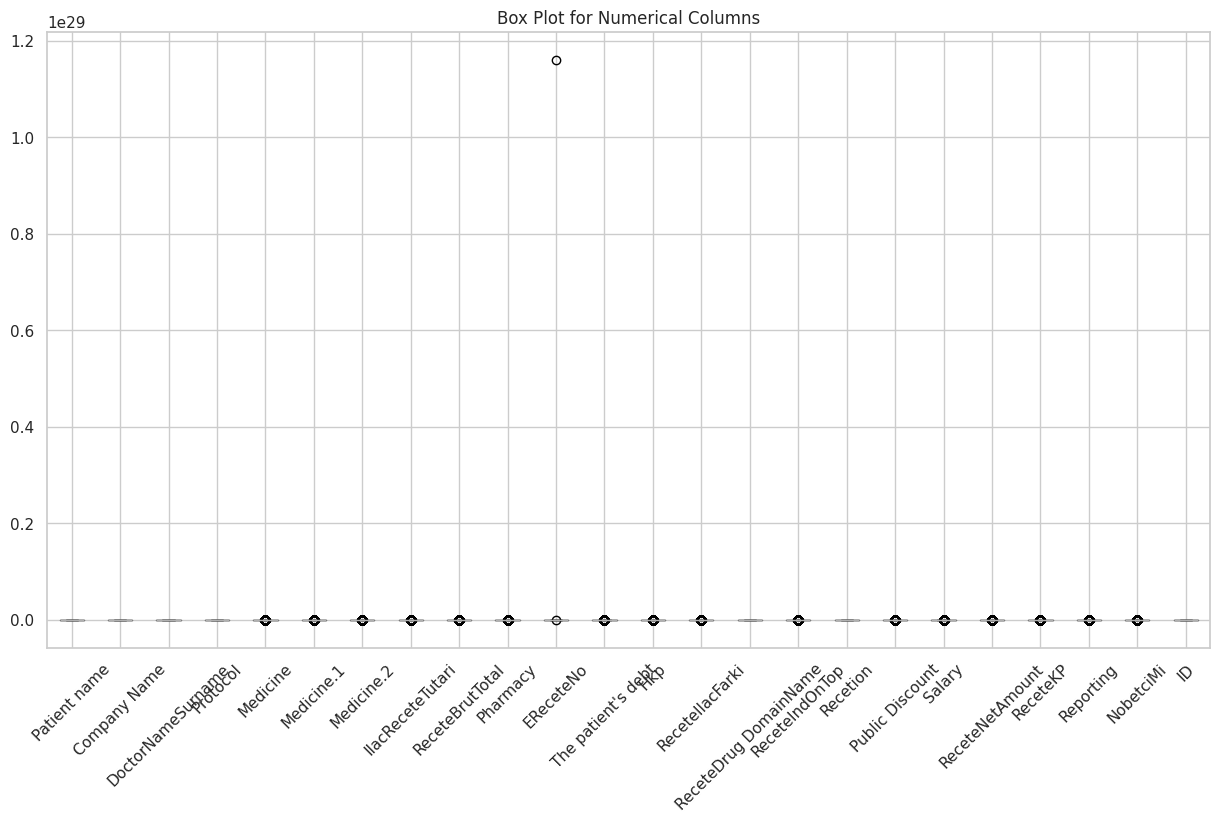


Анализ выбросов в числовых столбцах:
Medicine: 13545 выбросов (20.93%)
Medicine.1: 5182 выбросов (8.01%)
Medicine.2: 10494 выбросов (16.22%)
IlacReceteTutari: 6591 выбросов (10.19%)
ReceteBrutTotal: 6759 выбросов (10.45%)


In [80]:
# Поиск выбросов

numeric_data = data.select_dtypes(include=["number"])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:")
print(outliers)

# Строим график боксплот
numerical_columns = numeric_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
numeric_data[numerical_columns].boxplot()
plt.title("Box Plot for Numerical Columns")
plt.xticks(rotation=45)
plt.show()

# Анализ числовых столбцов на выбросы
numeric_cols = ['Medicine', 'Medicine.1', 'Medicine.2', 'IlacReceteTutari',
               'ReceteBrutTotal', 'Pharmacy', 'The patient\'s debt', 'Hkp',
               'ReceteIlacFarki', 'ReceteNetAmount']

numeric_cols = [col for col in numeric_cols if col in data.columns]

print(f"\nАнализ выбросов в числовых столбцах:")
for col in numeric_cols[:5]:  # Ограничим вывод первыми 5 столбцами
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} выбросов ({len(outliers)/len(df)*100:.2f}%)")

# 5. Анализ сезонности

Поскольку выбросы незначительные, далее перейдем к анализу сезонности.

Распределение данных по сезонам:


,count
Season,
Kış,23947
Sonbahar,15507
Yaz,12682
İlkbahar,12573


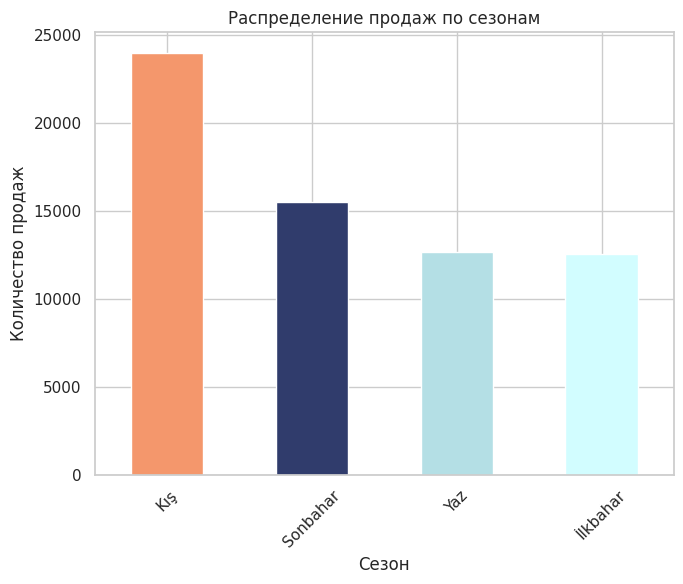

In [81]:
# Анализ распределения по сезонам
if 'Season' in data.columns:
    season_counts = data['Season'].value_counts()
    print("Распределение данных по сезонам:")
    display(season_counts)

    plt.figure(figsize=(7, 6))
    season_counts.plot(kind='bar', color=['#F4976C', '#303C6C', '#B4DFE5', '#D2FDFF'])
    plt.title('Распределение продаж по сезонам')
    plt.xlabel('Сезон')
    plt.ylabel('Количество продаж')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



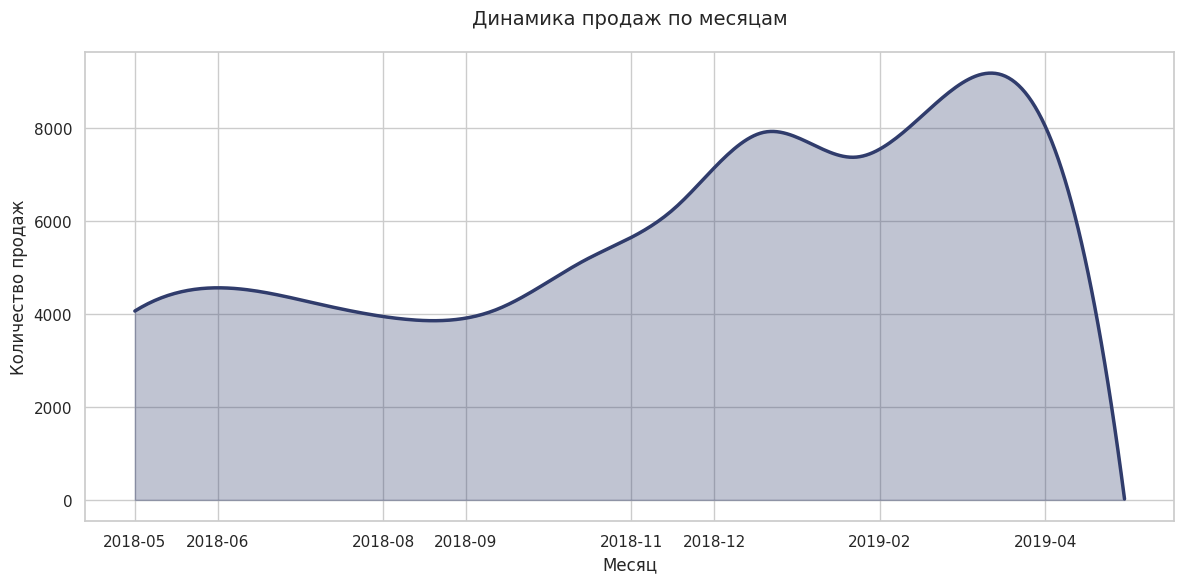

In [82]:
from scipy.interpolate import make_interp_spline

# Установка стиля seaborn
sns.set_theme(style="whitegrid")

if 'RecipeDate' in data.columns:
    data['RecipeDate'] = pd.to_datetime(data['RecipeDate'], errors='coerce')

    # Создаем колонку с месяцами в формате datetime
    data['Month'] = data['RecipeDate'].dt.to_period('M').dt.to_timestamp()
    monthly_sales = data.groupby(data['RecipeDate'].dt.to_period('M')).size()


    # Группируем данные по месяцам
    monthly_sales = data.groupby('Month').size().reset_index(name='Sales')

    # Создаем плавную линию с интерполяцией
    plt.figure(figsize=(12, 6))

    # Преобразуем даты в числовой формат для интерполяции
    monthly_sales = monthly_sales.sort_values('Month')
    x_num = np.arange(len(monthly_sales))
    y = monthly_sales['Sales'].values

    # Создаем плавную интерполяцию
    x_smooth = np.linspace(x_num.min(), x_num.max(), 300)
    spl = make_interp_spline(x_num, y, k=3)
    y_smooth = spl(x_smooth)

    # Создаем график с заливкой
    plt.fill_between(x_smooth, y_smooth, alpha=0.3, color='#303C6C')
    plt.plot(x_smooth, y_smooth, linewidth=2.5, color='#303C6C')

    # Настраиваем оси x
    n_ticks = min(8, len(monthly_sales))
    tick_positions = np.linspace(0, len(x_num)-1, n_ticks, dtype=int)
    plt.xticks(x_smooth[tick_positions * (300//len(x_num))],
               monthly_sales['Month'].dt.strftime('%Y-%m').iloc[tick_positions])

    plt.title('Динамика продаж по месяцам', fontsize=14, pad=20)
    plt.xlabel('Месяц', fontsize=12)
    plt.ylabel('Количество продаж', fontsize=12)
    plt.tight_layout()
    plt.show()

# 6. Анализ лекарств и цен

Далее построим график для определения распределения цен на конкретные лекарства за данный промежуток

10 самых популярных лекарств:


,count
Drug Name,
PEDlFEN 1OO MG/5 ML 1OO ML PEDlATRlK SURUP,1124
PAROL 5OO MG 2O TABLET,1089
DOLOREX 5O MG 2O DRAJE,969
lBURAMlN ZERO 1OO ML SUSPANSlYON,868
ARVELES 25 MG 2O FlLM TABLET,825
CALPOL 12O MG/5 ML 15O ML SUSPANSlYON,592
CORASPlN 1OO MG 3O TABLET,515
ENJEKTOR 2 CC,497
ENJEKTOR 5 CC,469


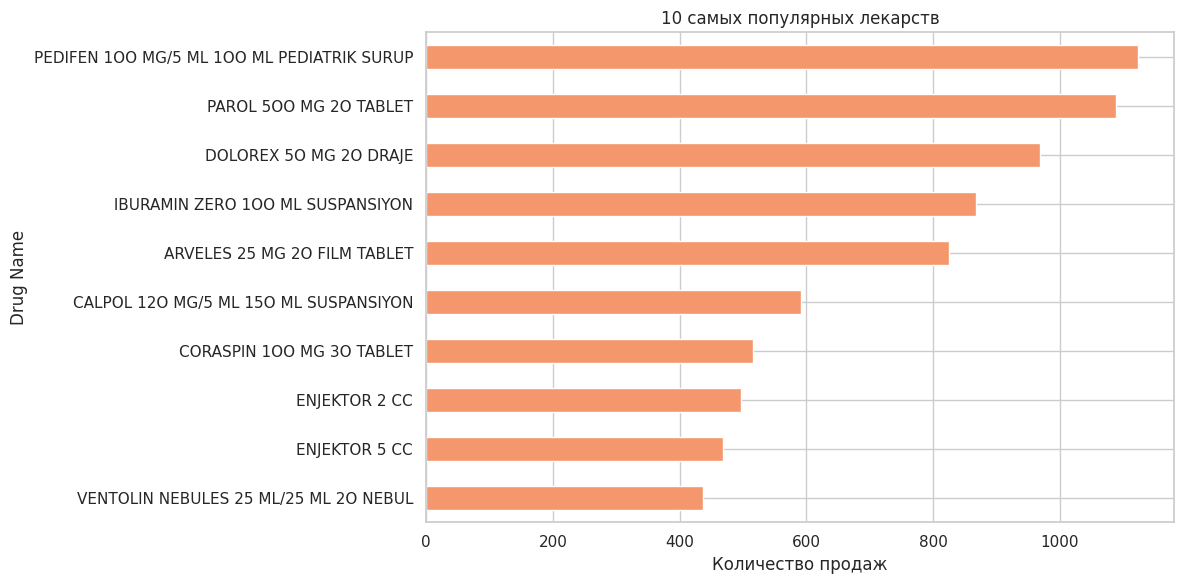

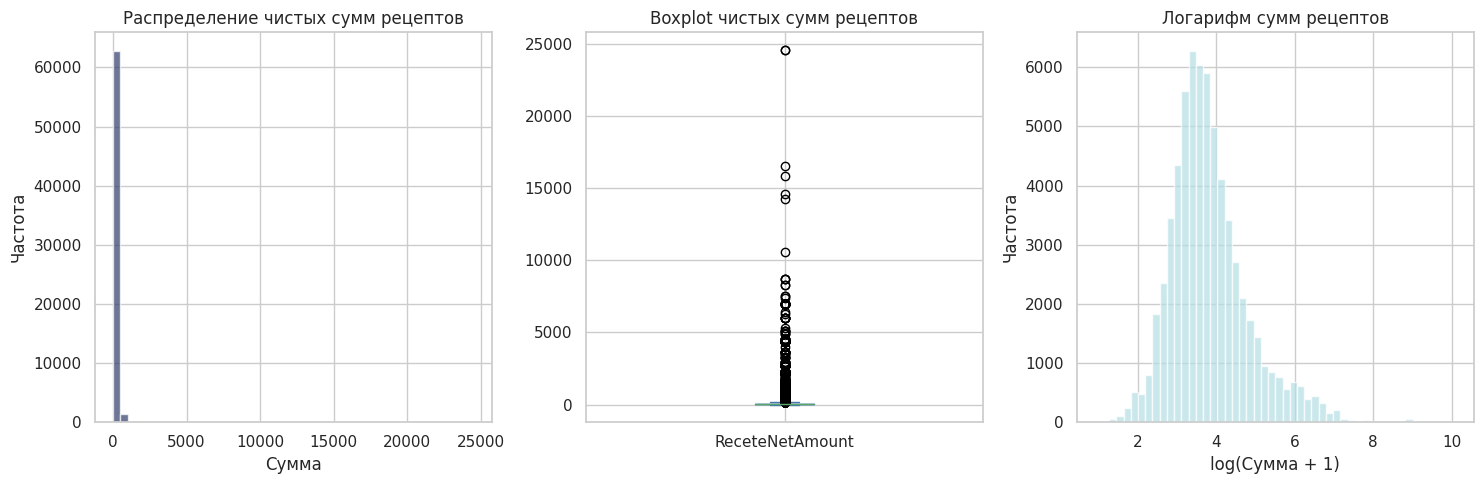

In [83]:
# 10 самых популярных лекарств
if 'Drug Name' in data.columns:
    top_drugs = data['Drug Name'].value_counts().head(10)
    print("10 самых популярных лекарств:")
    display(top_drugs)

    plt.figure(figsize=(12, 6))
    top_drugs.plot(kind='barh', color='#F4976C')
    plt.title('10 самых популярных лекарств')
    plt.xlabel('Количество продаж')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Анализ ценового распределения
if 'ReceteNetAmount' in data.columns:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    data['ReceteNetAmount'].hist(bins=50, alpha=0.7, color='#303C6C')
    plt.title('Распределение чистых сумм рецептов')
    plt.xlabel('Сумма')
    plt.ylabel('Частота')

    plt.subplot(1, 3, 2)
    data['ReceteNetAmount'].plot(kind='box')
    plt.title('Boxplot чистых сумм рецептов')

    plt.subplot(1, 3, 3)
    # Логарифмическое преобразование для лучшей визуализации
    np.log1p(df['ReceteNetAmount']).hist(bins=50, alpha=0.7, color='#B4DFE5')
    plt.title('Логарифм сумм рецептов')
    plt.xlabel('log(Сумма + 1)')
    plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

# 7. Метрики качества данных

Последним этапом анализа данных выведем основные метрики качества данных.

In [84]:
quality_metrics = {
    'Метрика': [
        'Общее количество записей',
        'Общее количество столбцов',
        'Полнота данных (не пропущено)',
        'Количество дубликатов',
        'Количество числовых столбцов',
        'Количество категориальных столбцов',
        'Количество временных столбцов',
        'Уникальных пациентов',
        'Уникальных лекарств',
        'Уникальных врачей'
    ],
    'Значение': [
        len(data),
        len(data.columns),
        f"{(1 - data.isnull().sum().sum() / (len(data) * len(data.columns))) * 100:.2f}%",
        data.duplicated().sum(),
        len(data.select_dtypes(include=[np.number]).columns),
        len(data.select_dtypes(include=['object']).columns),
        len([col for col in data.columns if 'date' in col.lower() or 'time' in col.lower()]),
        data['Patient name'].nunique() if 'Patient name' in data.columns else 'N/A',
        data['Drug Name'].nunique() if 'Drug Name' in data.columns else 'N/A',
        data['DoctorNameSurname'].nunique() if 'DoctorNameSurname' in data.columns else 'N/A'
    ]
}

quality_df = pd.DataFrame(quality_metrics)
display(quality_df)

,Метрика,Значение
0,Общее количество записей,64709
1,Общее количество столбцов,35
2,Полнота данных (не пропущено),98.74%
3,Количество дубликатов,0
4,Количество числовых столбцов,24
5,Количество категориальных столбцов,0
6,Количество временных столбцов,4
7,Уникальных пациентов,10339
8,Уникальных лекарств,2336
9,Уникальных врачей,1560


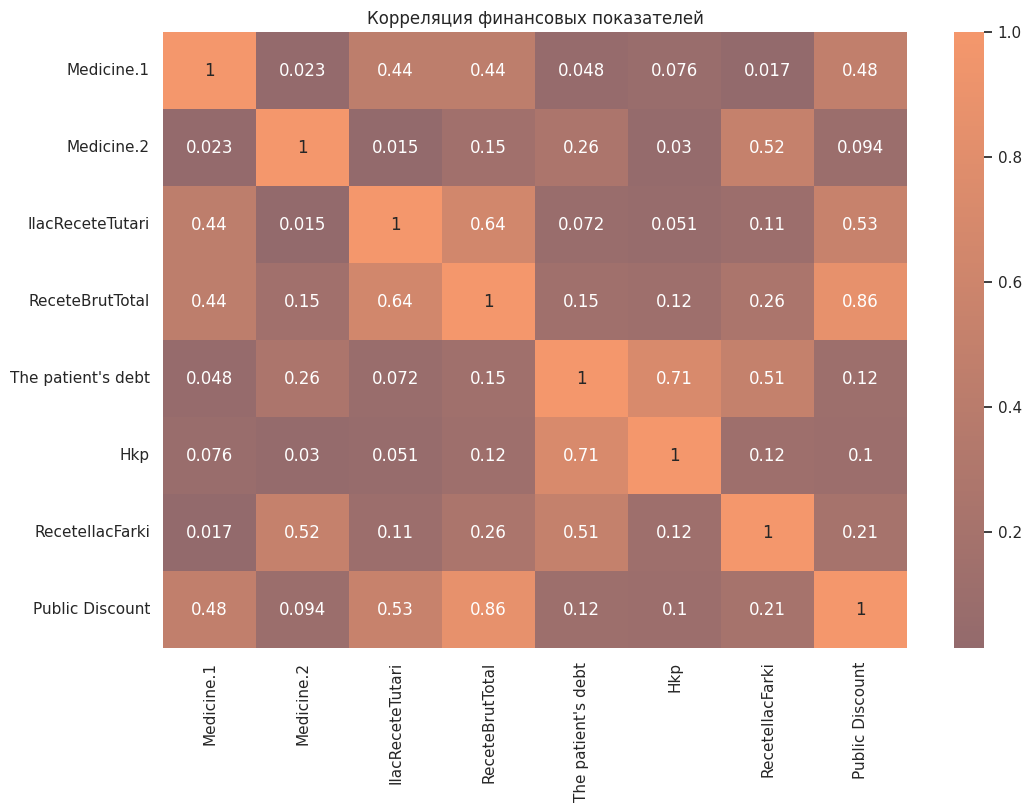

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Выбираем числовые колонки для корреляции
numeric_cols = ['Medicine.1', 'Medicine.2', 'IlacReceteTutari', 'ReceteBrutTotal',
                'The patient\'s debt', 'Hkp', 'ReceteIlacFarki', 'Public Discount']

# Создаем кастомную цветовую карту
colors = ['#303C6C', '#F4976C']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, center=0, cmap=custom_cmap)
plt.title('Корреляция финансовых показателей')
plt.show()

/tmp/ipython-input-1684376698.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




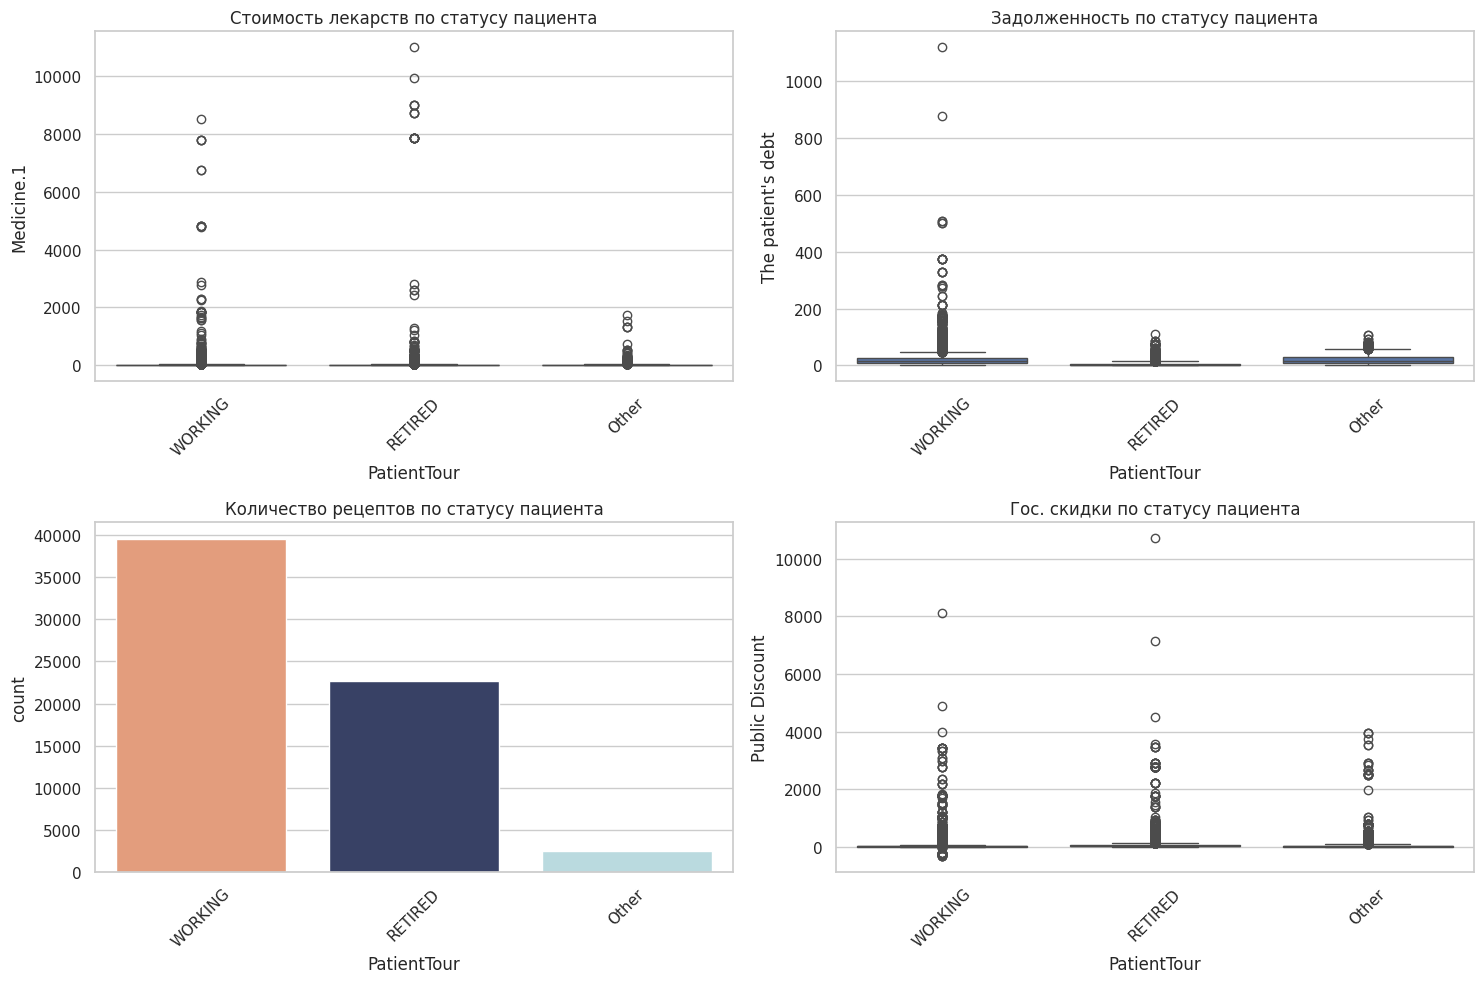

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=df, x='PatientTour', y='Medicine.1', ax=axes[0,0])
axes[0,0].set_title('Стоимость лекарств по статусу пациента')
axes[0,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='PatientTour', y='The patient\'s debt', ax=axes[0,1])
axes[0,1].set_title('Задолженность по статусу пациента')
axes[0,1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='PatientTour', ax=axes[1,0], palette=['#F4976C', '#303C6C', '#B4DFE5'])
axes[1,0].set_title('Количество рецептов по статусу пациента')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='PatientTour', y='Public Discount', ax=axes[1,1])
axes[1,1].set_title('Гос. скидки по статусу пациента')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [87]:
import plotly.express as px

# Матрица рассеяния для финансовых показателей
fig = px.scatter_matrix(df,
    dimensions=['Medicine.1', 'IlacReceteTutari', 'ReceteBrutTotal', 'The patient\'s debt'],
    color='PatientTour',
    color_discrete_sequence=['#F4976C', '#303C6C', '#B4DFE5'],
    title='Матрица рассеяния финансовых показателей по статусу пациента',
    width=900,
    height=800
)

fig.update_layout(
    plot_bgcolor='#e6e6e6',  # фон области графика
    paper_bgcolor='white', # фон всего изображения
    font=dict(size=10)     # размер шрифта
)

# фон для каждой отдельной ячейки
fig.update_traces(
    marker=dict(size=4, opacity=0.7),  # размер и прозрачность точек
    diagonal_visible=False,            # убрать гистограммы на диагонали
     showupperhalf=False
)

fig.show()

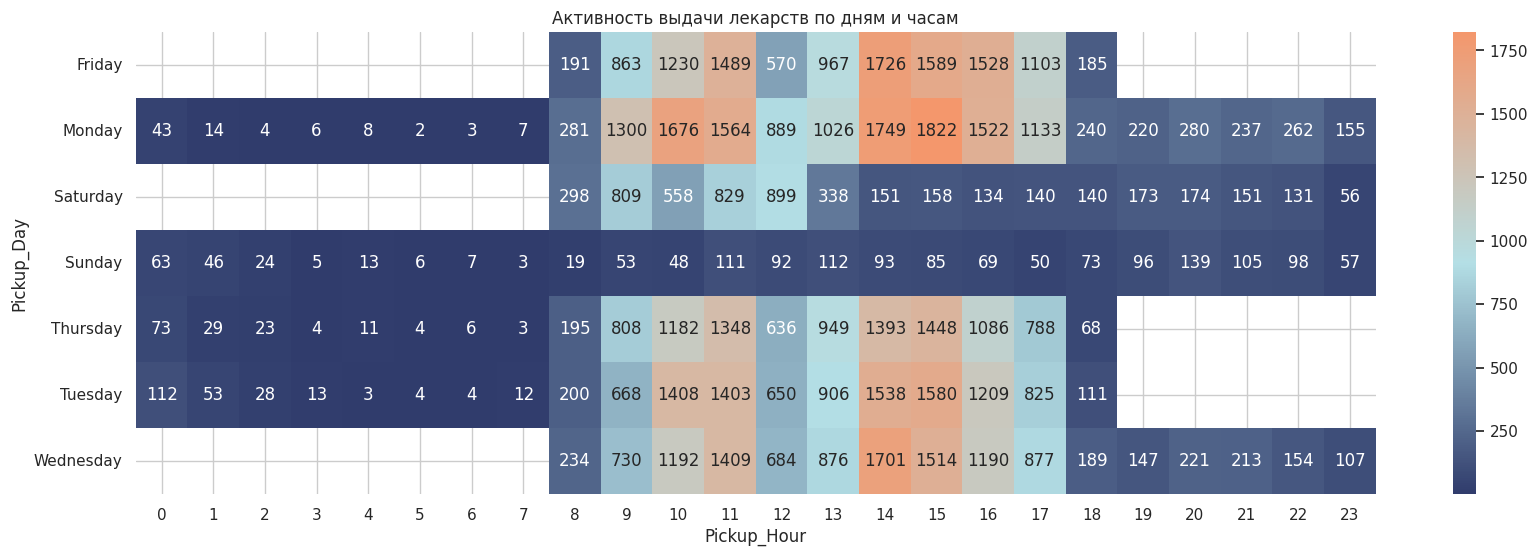

In [88]:
# Анализ по часам и дням недели
df['Pickup_Hour'] = df['Pickup Time'].dt.hour
df['Pickup_Day'] = df['Pickup Time'].dt.day_name()

pivot_table = df.pivot_table(index='Pickup_Day', columns='Pickup_Hour',
                           values='Protocol', aggfunc='count')

colors = ['#303C6C', '#B4DFE5', '#F4976C']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

plt.figure(figsize=(20, 6))
sns.heatmap(pivot_table, cmap=custom_cmap, annot=True, fmt='.0f')
plt.title('Активность выдачи лекарств по дням и часам')
plt.show()


# ИТОГИ

1. Структура данных:
   - Набор содержит подробную информацию о продажах лекарств
   - Включает данные о пациентах, врачах, лекарствах и финансовых операциях
   - Имеются временные метки для анализа динамики продаж

2. Качество данных:
   - Данные удовлетворительного качества и нуждаются в тщательной проверке
   - Отсутствуют полные дубликаты записей
   - При должной подготовке данный датасет позволяет проводить комплексный анализ взаимосвязи между сезонностью и продажам лекарств

3. Сезонность и продажи:
   - Возможно выявление сезонных паттернов в продажах лекарств, в осенний период наблюдался стабильный рост продаж и в большей степени он повышался в период с февраля по март.
   - Были обнаружены лидеры продеж среди лекарств

4. Выявленные зависимостей и результаты анализа:
   - Выявлена корреляция таких признаков, как "PublicDiscount" - "ReceteBrutTotal", "Hkp" - "The patient's debt", "The patient's debt" - "RecetellacFarki"
   - Больше всего рецептов принадлежит работающим пациентам
   - Корреляция также заметна для "IlacReceteTutari" (общпя сумма лекарства по рецепту) - "ReceteBrutTotal" (общая масса лекарства по рецепту)
   - Больше всего рецептов выдавалась в понедельник и пятницу, с 10-11 и с 14-15 часов